# **`Match Momentum`**

## **Instalacion de Librerias**

**Solo en caso de no tener Instalada las librerias se dara pie a utilizar `pip install (Nombre de la libreria)`**

In [1]:
#Aqui instalaremos todas las librerias
import pandas as pd  # Manipulación de datos tabulares y filtrado de datos.
import matplotlib.pyplot as plt  # Creación de gráficos de alta calidad.
from mplsoccer import Pitch  # Visualización de campos de fútbol y elementos relacionados.
from statsbombpy import sb  # Acceso a datos de eventos de fútbol de StatsBomb.
import requests  # Realización de solicitudes HTTP para acceder a datos en línea.
import json  # Manipulación de datos en formato JSON.
from bs4 import BeautifulSoup  # Extracción de datos de archivos HTML y XML mediante web scraping.


## Significados Básicos ##
+ **`HTTP` significa "Hypertext Transfer Protocol" (Protocolo de Transferencia de Hipertexto). Cuando accedes a una página web, tu navegador utiliza el protocolo HTTP para solicitar los recursos (como páginas HTML, imágenes, archivos CSS, etc.) del servidor donde está alojada la página web. La comunicación entre tu navegador y el servidor se realiza a través de solicitudes HTTP y respuestas HTTP.** 

+ **`URL` significa "Uniform Resource Locator" (Localizador Uniforme de Recursos). Es una cadena de caracteres que proporciona la dirección única de un recurso en la web.**

Por ejemplo, en la URL que proporcionaste:

https://www.fotmob.com/matches/cf-america-vs-tigres/1w7uw2#4378408

+ El esquema es "https".
+ El nombre de dominio es "www.fotmob.com".
+ La ruta del recurso es "/matches/cf-america-vs-tigres/1w7uw2".
+ El fragmento es "#4378408".
+ La URL en su conjunto especifica la ubicación de un recurso específico en la web, que en este caso parece ser un partido de fútbol entre el Club América y Tigres.








---

### Ahora sí, comenzamos con el código... 

La manera de explicar sera sencilla:

+ Código (Lo que vamos a utilizar)
+ Explicación (una celda de Markdown con lo que vamos a explicar)

In [2]:
url = 'https://www.fotmob.com/matches/cf-america-vs-tigres/1w7uw2#4378408'

r = requests.get(url)

 Estás utilizando la biblioteca `requests` para realizar una solicitud *HTTP* a la *URL* proporcionada ('https://www.fotmob.com/matches/cf-america-vs-tigres/1w7uw2#4378408'). La función `get` de la biblioteca *equests* se utiliza para obtener el contenido de la página web en esa URL. Después de ejecutar esta solicitud, el contenido de la página web estará almacenado en el objeto `r`.

---

### Extraccion de Datos

In [3]:
html = r.text

Después de realizar la solicitud HTTP con r = requests.get(url), el contenido de la página se almacena en la variable html utilizando html = r.text. En resumen, estás extrayendo el código fuente HTML de la página para luego procesarlo y extraer la información relevante.

In [4]:
soup = BeautifulSoup(html, 'html.parser')

1. Utilizamos BeautifulSoup, una biblioteca de Python para analizar y extraer información de documentos HTML y XML.
 
2. Estás creando un objeto BeautifulSoup llamado soup, que representa el documento HTML de la página. Este objeto te permite realizar búsquedas y manipulaciones más fáciles en la estructura del HTML para extraer datos específicos que necesitas para tu aplicación. 
 
3. Estás utilizando el analizador HTML incorporado ('html.parser') de BeautifulSoup para procesar el contenido HTML descargado.





 

In [5]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta content="app-id=488575683" name="apple-itunes-app"/><link href="android-app://com.mobilefootie.wc2010/http" rel="alternate"/><link href="/img/android-icon-192x192.png" rel="apple-touch-icon"/><meta content="all" name="robots"/><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/><meta content="FotMob" property="og:site_name"/><meta content="204905456199565" property="fb:app_id"/><meta content="christer.nordvik" property="fb:admins"/><meta content="https://www.facebook.com/fotmob" property="article:author"/><meta content="https://www.facebook.com/fotmob" property="article:publisher"/><meta content="iAsqa4atH8Kb02MqS9Sc0oZC__7WrvJYU6zYqJqE6Ww" name="google-site-verification"/><link href="https://pub.fotmob.com/prod/news/api/rss/world?fmt=atom" rel="alternate" title="World news" type="application/atom+xml"/><link href="https://www.fotmob.com/matches/cf-america-vs-tigres/1w7uw2" hreflang

Podemos observar el código HTML que solicitamos con *Beautifulsoup*

In [6]:
url = "https://www.fotmob.com/api/matchDetails?matchId=4378408"

payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


{"general":{"matchId":"4378408","matchName":"CF America-vs-Tigres_Mon, Dec 18, 2023, 01:30 UTC","matchRound":"final","teamColors":{"darkMode":{"home":"#E3D445","away":"#0033C5"},"lightMode":{"home":"#101878","away":"#FFB400"},"fontDarkMode":{"home":"rgba(29, 29, 29, 1.0)","away":"rgba(255, 255, 255, 1.0)"},"fontLightMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(29, 29, 29, 1.0)"}},"leagueId":888851,"leagueName":"Liga MX Apertura Playoff","leagueRoundName":"Final","parentLeagueId":230,"countryCode":"MEX","parentLeagueName":"Liga MX","parentLeagueSeason":"2023/2024 - Apertura","parentLeagueTopScorerLink":"https://data.fotmob.com/stats/230/season/20894/Apertura/goals.json","parentLeagueTournamentId":20894,"homeTeam":{"name":"CF America","id":6576},"awayTeam":{"name":"Tigres","id":8561},"coverageLevel":"xG","matchTimeUTC":"Mon, Dec 18, 2023, 01:30 UTC","matchTimeUTCDate":"2023-12-18T01:30:00.000Z","started":true,"finished":true},"header":{"teams":[{"name":"CF America","id":6576,"sc

Realizamos una solicitud GET a la URL "https://www.fotmob.com/api/matchDetails?matchId=4378408" utilizando la biblioteca requests de Python. La respuesta de la solicitud se almacena en la variable response. Finalmente, imprimes el contenido de la respuesta utilizando print(response.text).

Este código parece esta destinado a obtener detalles específicos de un partido identificado por el ID 4378408 desde la API de FotMob y mostrar la respuesta en formato de texto.

In [7]:
pd.DataFrame(response.json()['content']['shotmap']['shots'])

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,shotType,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,firstName,lastName,fullName,teamColor
0,2630359733,Miss,6576,895954,Álvaro Fidalgo,79.444175,35.677500,4,NaN,False,...,RightFoot,RegularPlay,FirstHalf,False,"{'x': 2, 'y': 0.05566816095059513, 'zoomRatio'...",False,Álvaro,Fidalgo,Álvaro Fidalgo,#101878
1,2630360123,Miss,8561,38098,Andre-Pierre Gignac,83.048058,20.776306,9,NaN,False,...,RightFoot,RegularPlay,FirstHalf,False,"{'x': 0, 'y': 0.2212957303779216, 'zoomRatio':...",False,Andre-Pierre,Gignac,Andre-Pierre Gignac,#0053A2
2,2630360355,AttemptSaved,6576,71724,Miguel Layun,72.461650,40.805714,11,NaN,True,...,RightFoot,FreeKick,FirstHalf,False,"{'x': 1.282407407407408, 'y': 0.32275132116402...",False,Miguel,Layun,Miguel Layun,#101878
3,2630360375,Miss,6576,720560,Julian Quinones,87.963235,41.830312,11,NaN,False,...,RightFoot,SetPiece,FirstHalf,False,"{'x': 2, 'y': 0.3557492479433042, 'zoomRatio':...",False,Julian,Quinones,Julian Quinones,#101878
4,2630361195,AttemptSaved,8561,127373,Rafael Carioca,74.488835,41.367812,17,NaN,False,...,RightFoot,RegularPlay,FirstHalf,False,"{'x': 0.6369047619047613, 'y': 0.4297688644973...",False,Rafael,Carioca,Rafael Carioca,#0053A2
5,2630361269,AttemptSaved,8561,915602,Francisco Cordova,76.516019,34.533750,18,NaN,False,...,LeftFoot,RegularPlay,FirstHalf,False,"{'x': 0.6570767195767175, 'y': 0.1070175433333...",False,Francisco,Cordova,Francisco Cordova,#0053A2
6,2630361909,AttemptSaved,6576,390758,Diego Valdés,77.529612,37.278750,23,NaN,True,...,RightFoot,RegularPlay,FirstHalf,False,"{'x': 0.47552910052910013, 'y': 0.322751321164...",False,Diego,Valdés,Diego Valdés,#101878
7,2630362625,AttemptSaved,6576,390758,Diego Valdés,96.894737,28.875238,28,NaN,False,...,RightFoot,RegularPlay,FirstHalf,False,"{'x': 1.1008597883597888, 'y': 0.2802840420634...",False,Diego,Valdés,Diego Valdés,#101878
8,2630362929,Miss,6576,720560,Julian Quinones,92.700000,50.937070,29,NaN,False,...,Header,RegularPlay,FirstHalf,False,"{'x': 0, 'y': 0.07726071741055168, 'zoomRatio'...",False,Julian,Quinones,Julian Quinones,#101878
9,2630363539,AttemptSaved,8561,38098,Andre-Pierre Gignac,101.017241,37.756000,34,NaN,False,...,Header,SetPiece,FirstHalf,False,"{'x': 1.121031746031747, 'y': 0.39749373238095...",False,Andre-Pierre,Gignac,Andre-Pierre Gignac,#0053A2


la biblioteca pandas de Python para crear un DataFrame a partir de los datos contenidos en la respuesta de la solicitud anterior. La respuesta se interpreta como JSON usando response.json(), y luego se accede a la parte específica de los datos que contiene la información del "shotmap" mediante ['content']['shotmap']['shots']. Finalmente, esta información se utiliza para crear un DataFrame con pd.DataFrame(...).

In [8]:
json_fotmob = json.loads(soup.find('script', attrs={'id':'__NEXT_DATA__'}).contents[0])

En este fragmento de código, estás utilizando la biblioteca `BeautifulSoup` para analizar el contenido HTML de una página web. En particular, estás buscando un elemento `<script>` con el atributo `id` establecido en `'__NEXT_DATA__'`. Luego, extraes el contenido de ese script y lo cargas como un objeto JSON utilizando la función `json.loads()` de la biblioteca `json`. Esto sugiere que el contenido del script con `id` '__NEXT_DATA__' contiene datos en formato JSON que son relevantes para tu aplicación.

In [9]:
json_fotmob.keys()

dict_keys(['props', 'page', 'query', 'buildId', 'isFallback', 'dynamicIds', 'gssp', 'customServer', 'appGip', 'locale', 'locales', 'defaultLocale', 'scriptLoader'])

Utilizando el método keys() en el objeto json_fotmob, que se asume que es un diccionario en formato JSON. Este método devuelve una vista de todas las claves en el diccionario JSON, proporcionándote una lista de las claves disponibles. Puedes usar esta lista para explorar la estructura de los datos JSON y acceder a información específica que necesites en tu código.

In [10]:
json_fotmob['props']['pageProps'].keys()

dict_keys(['general', 'header', 'nav', 'ongoing', 'hasPendingVAR', 'content', 'seo', 'ssr', 'fallback', '_nextI18Next'])

Aquí estás accediendo a las claves de los objetos `props` y `pageProps` dentro del diccionario `json_fotmob`. Esto generalmente se hace para explorar la estructura interna de los datos JSON y entender cómo están organizados. Puedes usar estas claves para acceder a información específica que necesitas en tu código.

En la salida obtenemos las claves del diccionario `json_fotmob['props']['pageProps']`. Aquí tienes una breve descripción de cada clave:

- `general`: Información general del partido.
- `header`: Detalles del encabezado del partido.
- `nav`: Navegación relacionada con el partido.
- `ongoing`: Información sobre el estado actual del partido.
- `hasPendingVAR`: Indicador de si hay decisiones pendientes del VAR.
- `content`: Contenido del partido, que incluye información detallada como alineaciones, eventos, estadísticas, etc.
- `seo`: Metadatos relacionados con la optimización para motores de búsqueda (SEO).
- `ssr`: Información relacionada con Server-Side Rendering (SSR).
- `fallback`: Información de respaldo en caso de que haya algún problema.
- `_nextI18Next`: Configuración para el manejo de internacionalización (i18n) en Next.js.

Estas claves te permitirán acceder a datos específicos dentro de la estructura JSON y utilizar la información que necesitas en tu código.

In [11]:
estadisticas_generales = json_fotmob['props']['pageProps']['general']
estadisticas_generales

{'matchId': '4378408',
 'matchName': 'CF America-vs-Tigres_Mon, Dec 18, 2023, 01:30 UTC',
 'matchRound': 'final',
 'teamColors': {'darkMode': {'home': '#E3D445', 'away': '#0033C5'},
  'lightMode': {'home': '#101878', 'away': '#FFB400'},
  'fontDarkMode': {'home': 'rgba(29, 29, 29, 1.0)',
   'away': 'rgba(255, 255, 255, 1.0)'},
  'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(29, 29, 29, 1.0)'}},
 'leagueId': 888851,
 'leagueName': 'Liga MX Apertura Playoff',
 'leagueRoundName': 'Final',
 'parentLeagueId': 230,
 'countryCode': 'MEX',
 'homeTeam': {'name': 'CF America', 'id': 6576},
 'awayTeam': {'name': 'Tigres', 'id': 8561},
 'coverageLevel': 'xG',
 'matchTimeUTC': 'Mon, Dec 18, 2023, 01:30 UTC',
 'matchTimeUTCDate': '2023-12-18T01:30:00.000Z',
 'started': True,
 'finished': True}

Obtenemos las estadisticas_generales:

+ matchId: Identificación única del partido.
+ matchName: Nombre del partido, que incluye los equipos y la fecha.
+ matchRound: Ronda del partido (en este caso, "final").
+ teamColors: Colores de los equipos en diferentes modos y formatos.
+ darkMode: Colores en modo oscuro.
+ lightMode: Colores en modo claro.
+ fontDarkMode: Colores de la fuente en modo oscuro.
+ fontLightMode: Colores de la fuente en modo claro.
+ leagueId: Identificación única de la liga.
+ leagueName: Nombre de la liga.
+ leagueRoundName: Nombre de la ronda de la liga.
+ parentLeagueId: Identificación única de la liga principal.
+ countryCode: Código del país (en este caso, "MEX" para México).
+ homeTeam: Información sobre el equipo local.
+ name: Nombre del equipo local (CF America).
+ id: Identificación única del equipo local.
+ awayTeam: Información sobre el equipo visitante.
+ name: Nombre del equipo visitante (Tigres).
+ id: Identificación única del equipo visitante.
+ coverageLevel: Nivel de cobertura (en este caso, "xG").
+ matchTimeUTC: Hora del partido en formato UTC.
+ matchTimeUTCDate: Fecha y hora del partido en formato UTC.
+ started: Indicador de si el partido ha comenzado.
+ finished: Indicador de si el partido ha terminado.

Estos datos proporcionan información detallada sobre el partido y son útiles para entender su contexto y características.

In [12]:
json_fotmob['props']['pageProps']['content'].keys()

dict_keys(['matchFacts', 'liveticker', 'superlive', 'buzz', 'stats', 'shotmap', 'lineup', 'playoff', 'table', 'h2h', 'momentum'])

la estructura paso a paso:

json_fotmob: Es un diccionario obtenido de la respuesta del análisis de la página web.
+ ['props']: Accedemos a la clave 'props' dentro de json_fotmob.
+ ['pageProps']: Accedemos a la clave 'pageProps' dentro del diccionario asociado a 'props'.
+ ['content']: Accedemos a la clave 'content' dentro del diccionario asociado a 'pageProps'.


las claves dentro de json_fotmob['props']['pageProps']['content']:

matchFacts: Datos generales del partido.

liveticker: Datos del marcador en vivo.

superlive: Datos superlive (posición en el campo, eventos en tiempo real).

buzz: Datos de comentarios y discusiones.

stats: Estadísticas generales del partido.

shotmap: Datos del mapa de tiros.

lineup: Datos de alineaciones.

playoff: Datos de playoff (si está disponible).

table: Datos de la tabla de clasificación.

h2h: Datos de enfrentamientos directos (Head-to-Head).

momentum: Datos de momentum (si está disponible).

In [13]:
momentum_data = json_fotmob['props']['pageProps']['content']['momentum']

Este código se encarga de extraer la información relacionada con el "momentum" del partido de fútbol de la estructura de datos json_fotmob.

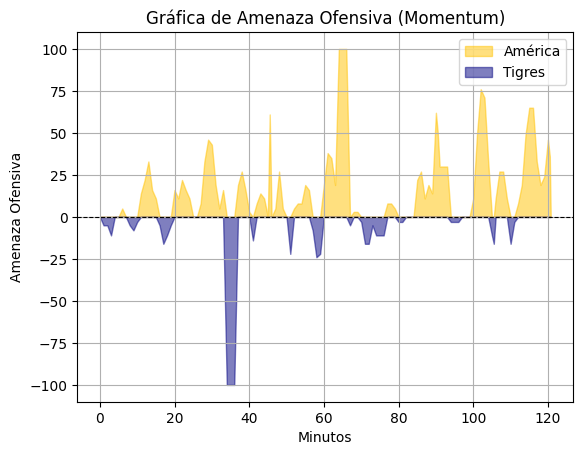

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Datos del momento para América y Tigres
valores_america = np.array([item['value'] if item['value'] >= 0 else 0 for item in momentum_data['main']['data']])
minutos_america = np.array([item['minute'] for item in momentum_data['main']['data']])

# Datos del momento para Tigres
valores_tigres = np.array([item['value'] if item['value'] < 0 else 0 for item in momentum_data['main']['data']])
minutos_tigres = np.array([item['minute'] for item in momentum_data['main']['data']])

# Gráfica de amenaza ofensiva para el equipo América (amarillo)
plt.fill_between(minutos_america, 0, valores_america, label='América', color='#ffc200', alpha=0.5)

# Gráfica de amenaza ofensiva para el equipo Tigres (rojo)
plt.fill_between(minutos_tigres, 0, valores_tigres, label='Tigres', color='navy', alpha=0.5)

# Línea en el eje y en 0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Configuración de la gráfica
plt.title('Gráfica de Amenaza Ofensiva (Momentum)')
plt.xlabel('Minutos')
plt.ylabel('Amenaza Ofensiva')
plt.legend()
plt.grid(True)
plt.show()

Este código utiliza la biblioteca matplotlib para crear una gráfica que visualiza el "momentum" ofensivo de los equipos América y Tigres a lo largo del tiempo durante un partido de fútbol. Aquí está el desglose:

+ Importación de Bibliotecas:

import matplotlib.pyplot as plt: Importa la biblioteca matplotlib y le asigna el alias plt para su uso en el código.
import numpy as np: Importa la biblioteca numpy y le asigna el alias np. numpy se utiliza para manipulación de datos.
  
+ Procesamiento de Datos:

Se extraen datos específicos de momentum_data para ambos equipos: América y Tigres.
Se crean arrays numpy (valores_america, minutos_america, valores_tigres, minutos_tigres) que contienen los valores y los minutos correspondientes para cada equipo.
+ Creación de la Gráfica:

plt.fill_between(): Crea áreas sombreadas entre cero y los valores correspondientes para los momentos ofensivos de América y Tigres. El color y la transparencia de estas áreas se establecen con los parámetros color y alpha.
plt.axhline(): Agrega una línea horizontal en el eje y en 0, representando el punto neutral.
Configuración de títulos y etiquetas de ejes.
Configuración Estética y Mostrar la Gráfica:

plt.title(): Establece el título de la gráfica.
plt.xlabel(): Etiqueta el eje x.
plt.ylabel(): Etiqueta el eje y.
plt.legend(): Muestra la leyenda de la gráfica con los nombres de los equipos.
plt.grid(): Agrega una cuadrícula a la gráfica.
plt.show(): Muestra la gráfica resultante.

Espero les guste,siendo mi primer repositorio, ya que tengo poco porgramando espero les guste.

Me pueden seguir en mis redes:

+ X (Twitter): [@Rod_Analyst](https://twitter.com/Rod_Analyst)

+ LinkedIn: [Rodolfo Emmanuel González Rendón](https://www.linkedin.com/in/rodolfo-gonzalez1788/)

+ Tik Tok: [@rod_sport_analyst](https://www.tiktok.com/@rod_sport_analyst?is_from_webapp=1&sender_device=pc)